## Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Read

In [17]:
# Read cleaned data

df = pd.read_csv('data/cleaned_credit_data3.csv')
print(df.shape)
df.head()

(20786, 15)


,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score
0,23,Scientist,19114,3,4,0.03,4,5,4,4,Good,809,0.31,268,1
1,23,Scientist,19114,3,4,0.03,4,8,4,4,Good,809,0.27,270,1
2,23,Scientist,19114,3,4,0.03,4,3,8,4,Good,809,0.23,271,1
3,28,Teacher,34847,2,4,0.06,1,7,1,2,Good,605,0.39,320,1
4,28,Teacher,34847,2,4,0.06,1,3,3,2,Good,605,0.39,322,1


## Dummy Coding

In [18]:
# One Hot Encoder - Creating Dummy Variables for 'Occupation' and 'Credit_Mix

ohe = preprocessing.OneHotEncoder(sparse=False)

oh_encoded = ohe.fit_transform(df[['Occupation','Credit_Mix']])
df_oh_encoded = pd.DataFrame(oh_encoded, columns=ohe.get_feature_names_out(['Occupation', 'Credit_Mix']))

df = pd.concat([df, df_oh_encoded], axis=1)

df.drop(['Occupation', 'Credit_Mix'], axis=1, inplace=True)

df.head()


/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,23,19114,3,4,0.03,4,5,4,4,809,0.31,268,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,23,19114,3,4,0.03,4,8,4,4,809,0.27,270,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23,19114,3,4,0.03,4,3,8,4,809,0.23,271,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,28,34847,2,4,0.06,1,7,1,2,605,0.39,320,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,34847,2,4,0.06,1,3,3,2,605,0.39,322,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Split Data (Test & Train)

In [19]:
# Separate X from y

outcome = 'Credit_Score'
predictors = list(df.columns)
predictors.remove(outcome)

X = df[predictors]
y = df[outcome]

In [20]:
# split dataset into training (70%) and test (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14550, 30) (6236, 30) (14550,) (6236,)


## Scaling

In [21]:
# Standardize

scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Save Data for Later

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled.to_csv('data/X_train_scaled.csv', index=False)
pd.read_csv('data/X_train_scaled.csv')

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,-0.719788,1.910721,0.993643,-0.696282,-0.085800,-1.079806,0.071604,0.042763,-1.006320,-0.845139,1.299737,0.867767,3.615462,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.2721,-0.253568,-0.633612,-0.906231,1.675680
1,-0.504771,-0.273414,0.993643,0.637961,1.049382,2.140522,1.598690,1.499579,1.233729,0.489250,1.688976,-1.567108,-0.276590,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,3.800771,-0.275292,-0.2721,-0.253568,1.578253,-0.906231,-0.596773
2,-0.397263,-0.562482,0.287779,0.193213,0.636589,0.530358,0.499188,1.499579,0.487046,0.744290,1.299737,-1.486616,-0.276590,-0.263254,3.679058,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.2721,-0.253568,1.578253,-0.906231,-0.596773
3,-0.504771,-1.100813,1.346576,1.972204,0.430192,2.140522,1.476523,1.353897,0.487046,0.847002,-0.451838,-0.792375,-0.276590,-0.263254,-0.271809,-0.268293,-0.274279,3.690950,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.2721,-0.253568,1.578253,-0.906231,-0.596773
4,0.785327,-0.817872,0.640711,0.637961,0.430192,0.932899,0.560271,1.208216,0.238152,0.231599,0.715879,0.103096,-0.276590,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,3.800771,-0.275292,-0.2721,-0.253568,1.578253,-0.906231,-0.596773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14545,-0.934804,2.102973,-1.476882,-0.251535,-0.911387,-1.482347,-0.478147,-0.248600,0.238152,-0.818155,-0.841077,0.344571,-0.276590,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,3.846823,-0.263105,-0.275292,-0.2721,-0.253568,-0.633612,1.103472,-0.596773
14546,-1.364837,1.598422,-1.123949,-0.251535,-0.808189,-0.274724,-0.478147,-0.685644,-0.757426,-0.130505,-0.841077,0.374755,-0.276590,-0.263254,-0.271809,3.727268,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.2721,-0.253568,-0.633612,1.103472,-0.596773
14547,0.462802,2.636029,-1.476882,-0.251535,-0.808189,-1.079806,-0.172730,-1.268371,-1.255214,-0.394250,-0.257219,1.290349,-0.276590,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.2721,3.943717,-0.633612,1.103472,-0.596773
14548,0.247786,-0.779899,1.699508,1.972204,0.430192,0.932899,-0.172730,1.790942,1.233729,0.593703,-1.424936,-0.088072,-0.276590,-0.263254,-0.271809,-0.268293,-0.274279,3.690950,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.2721,-0.253568,1.578253,-0.906231,-0.596773


In [23]:
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_train.columns
X_test_scaled.to_csv('data/X_test_scaled.csv', index=False)
pd.read_csv('data/X_test_scaled.csv')

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,0.570311,-0.841656,1.699508,-0.251535,0.223795,0.932899,0.071604,-0.539963,1.482623,0.632003,-0.451838,-1.134465,-0.27659,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,3.731364,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.272100,-0.253568,-0.633612,-0.906231,1.675680
1,-0.934804,-0.673137,-0.771017,0.193213,-1.220982,-0.274724,0.071604,0.479808,-0.757426,-0.873864,-1.035697,1.743115,-0.27659,-0.263254,3.679058,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.272100,-0.253568,-0.633612,1.103472,-0.596773
2,-1.042312,-0.860115,0.640711,0.637961,0.223795,-0.677265,1.598690,1.790942,-0.010743,-0.209716,-1.230316,0.163465,-0.27659,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,3.675116,-0.253568,1.578253,-0.906231,-0.596773
3,-0.289755,-0.753127,-0.771017,-0.251535,-0.498594,-0.677265,-0.783564,0.479808,-1.255214,-1.044471,1.105118,1.099181,-0.27659,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,3.675116,-0.253568,-0.633612,1.103472,-0.596773
4,-0.397263,-0.385500,1.699508,1.972204,1.978167,0.932899,0.010521,0.916853,1.482623,2.066493,0.326640,-1.899136,-0.27659,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,3.800771,-0.275292,-0.272100,-0.253568,1.578253,-0.906231,-0.596773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0.462802,-0.830706,-0.771017,1.527456,1.978167,1.335440,-0.478147,-0.394281,1.731518,0.189818,0.521259,-0.862805,-0.27659,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.272100,3.943717,-0.633612,-0.906231,1.675680
6232,1.860409,-0.819078,-1.829814,-0.696282,-1.324181,-0.677265,-1.088981,-0.394281,-1.255214,-0.172287,-1.814175,1.330595,-0.27659,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.272100,3.943717,-0.633612,1.103472,-0.596773
6233,0.247786,-1.091043,-0.771017,0.637961,1.049382,-0.274724,-0.600314,0.334126,1.980412,0.107996,1.299737,-0.973481,-0.27659,3.798616,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,-0.263105,-0.275292,-0.272100,-0.253568,-0.633612,-0.906231,1.675680
6234,1.000343,-0.746120,-0.065153,-1.141030,-0.704990,-0.274724,0.193771,-0.102918,-0.508531,-0.511759,-0.451838,0.958321,-0.27659,-0.263254,-0.271809,-0.268293,-0.274279,-0.270933,-0.267999,-0.265782,-0.255252,-0.269762,-0.259955,3.800771,-0.275292,-0.272100,-0.253568,-0.633612,1.103472,-0.596773


In [24]:
pd.DataFrame(y_train).to_csv('data/y_train.csv', index=False)
pd.read_csv('data/y_train.csv')

,Credit_Score
0,1
1,0
2,0
3,0
4,0
...,...
14545,1
14546,1
14547,0
14548,0


In [25]:
pd.DataFrame(y_test).to_csv('data/y_test.csv', index=False)
pd.read_csv('data/y_test.csv')

,Credit_Score
0,0
1,0
2,0
3,1
4,0
...,...
6231,0
6232,0
6233,0
6234,0


## K-NN Classfication Model

In [26]:
# Try out K-NN model with k=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9305644644002565


In [27]:
# Let's find the best number for k

results = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_scaled))
    })

results_df = pd.DataFrame(results)
results_df.loc[results_df.accuracy == results_df.accuracy.max()]

,k,accuracy
0,1,0.930564


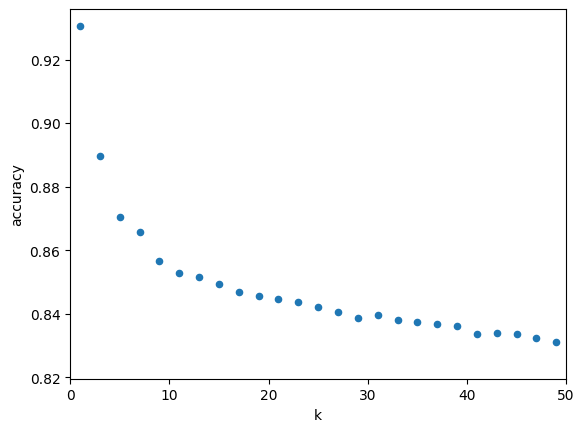

In [28]:
results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 50]);

In [29]:
# We choose k=1 based on the accuracy
# Confusion Matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

pred_y = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, pred_y))
print('Accuracy:', accuracy_score(y_test, pred_y))

[[3470  241]
 [ 192 2333]]
Accuracy: 0.9305644644002565


## Data Reduction

In [30]:
# Let's find out the ideal number of components first

pcs = PCA()
pcs.fit(X_train_scaled)

# view the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.247,0.247
1,0.051,0.297
2,0.037,0.334
3,0.036,0.371
4,0.036,0.407
5,0.036,0.442
6,0.036,0.478
7,0.036,0.514
8,0.036,0.550
9,0.036,0.586


    0     1     2     3     4     5     6     7     8     9     10    11  \
0  7.4  1.53  1.11  1.08  1.08  1.08  1.08  1.07  1.07  1.07  1.07  1.07   

     12    13    14    15    16    17    18    19    20    21    22    23  \
0  1.07  1.07  1.07  1.05  1.02  0.91  0.74  0.63  0.52  0.41  0.38  0.35   

     24    25    26    27   28   29  
0  0.33  0.29  0.27  0.16  0.0  0.0  


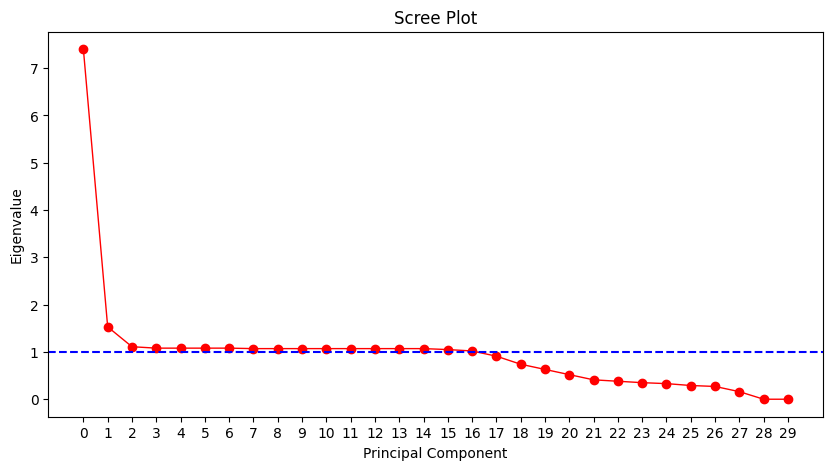

In [31]:
# Latent Root Criterion (Kaiser) and Scree Test

eig=pcs.explained_variance_.round(2)
print(pd.DataFrame(eig).T)

xvals = np.arange(X_train_scaled.shape[1]);

plt.figure(figsize=(10,5))
plt.plot(xvals, eig, 'ro-', linewidth=1)
plt.xticks(xvals)

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.axhline(y=1, color='b', linestyle='--')

1. Percentage of Variance Criterion: First 11

2. Latent Root Criterion / Kaiser Rule: First 17

3. Scree Test Criterion: First 2

In [32]:
# 1. Percentage of Variance Criterion: First 11

pcs = PCA(n_components=11)
X_train_pcs = pcs.fit_transform(X_train_scaled)
X_test_pcs = pcs.transform(X_test_scaled)

results = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_pcs, y_train)
    
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_pcs))
    })

results_df = pd.DataFrame(results)
results_df.loc[results_df.accuracy == results_df.accuracy.max()]

,k,accuracy
0,1,0.843489


In [33]:
# 2. Latent Root Criterion / Kaiser Rule: First 17

pcs = PCA(n_components=16)
X_train_pcs = pcs.fit_transform(X_train_scaled)
X_test_pcs = pcs.transform(X_test_scaled)

results = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_pcs, y_train)
    
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_pcs))
    })

results_df = pd.DataFrame(results)
results_df.loc[results_df.accuracy == results_df.accuracy.max()]

,k,accuracy
0,1,0.8483


In [34]:
# 3. Scree Test Criterion: First 2

pcs = PCA(n_components=2)
X_train_pcs = pcs.fit_transform(X_train_scaled)
X_test_pcs = pcs.transform(X_test_scaled)

results = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_pcs, y_train)
    
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_pcs))
    })

results_df = pd.DataFrame(results)
results_df.loc[results_df.accuracy == results_df.accuracy.max()]

,k,accuracy
34,69,0.829859
36,73,0.829859


In [35]:
from sklearn.ensemble import RandomForestClassifier

pcs = PCA(n_components=11)
X_train_pcs = pcs.fit_transform(X_train_scaled)
X_test_pcs = pcs.transform(X_test_scaled)

rf = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.9419499679281591
[[3492  219]
 [ 143 2382]]
